In [26]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [15]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Question 1 - Extracting Tesla Stock Data Using yfinance

In [3]:
import yfinance as yf

tesla_data = yf.Ticker("TSLA")
hist = tesla_data.history(period="max")
print(hist.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [16]:
read_html_pandas_data = pd.read_html(url)
read_html_pandas_data = pd.read_html(str(soup))
tesla_revenue = read_html_pandas_data[0]

print(tesla_revenue.tail())

    Tesla Annual Revenue (Millions of US $)  \
8                                      2013   
9                                      2012   
10                                     2011   
11                                     2010   
12                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
8                                     $2,013  
9                                       $413  
10                                      $204  
11                                      $117  
12                                      $112  


#Question 3: Use yfinance to Extract Stock Data

In [22]:
gme_data = yf.Ticker("GME")
gme_data = gme_data.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


#Question 4: Use Webscraping to Extract GME Revenue Data

In [25]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2  = requests.get(url).text
soup = BeautifulSoup(html_data_2, 'html.parser')
gme_revenue = pd.DataFrame(columns=["Year", "Annual Revenue"])
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    year = col[0].text
    annual_revenue = col[1].text
gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Year":[year], "Annual Revenue":[annual_revenue]})], ignore_index=True)
print(gme_revenue.tail())

   Year Annual Revenue
0  2005         $1,843


#Question 5: Plot Tesla Stock Graph

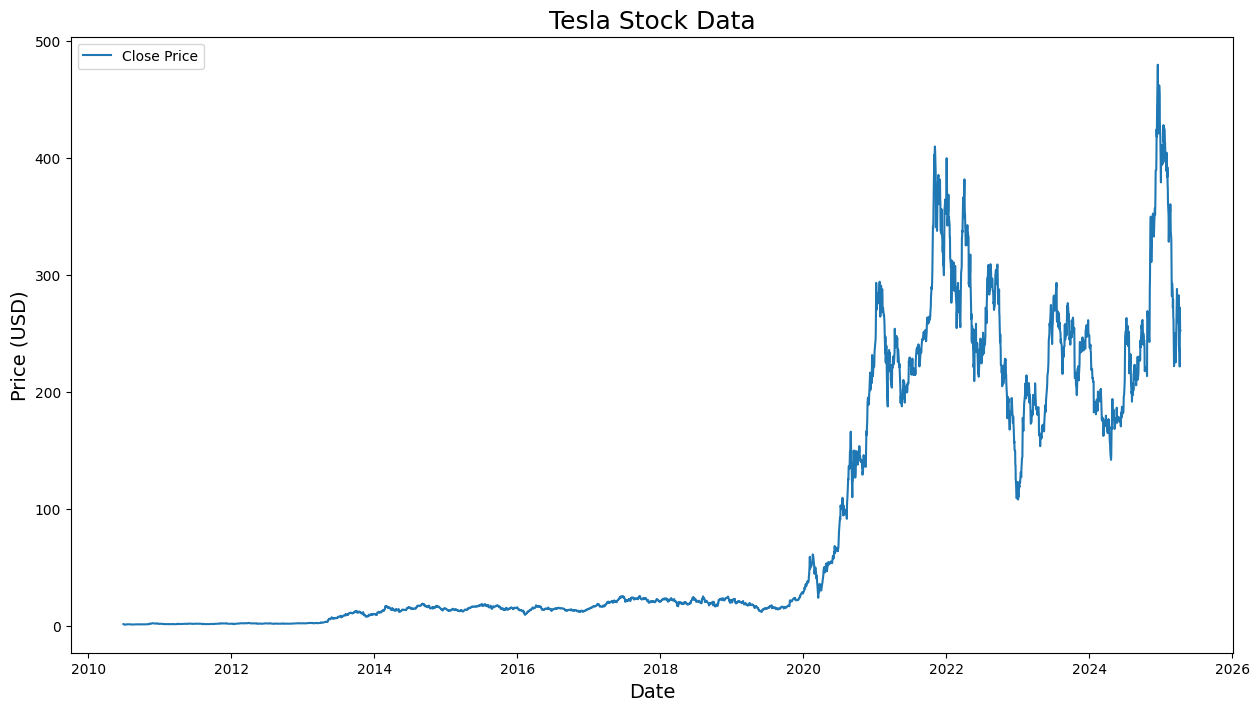

In [30]:
def make_graph(stock_data, revenue_data, title):
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Price (USD)", fontsize=14)
    ax.set_title(f"{title} Stock Data", fontsize=18)
    ax.legend()
    plt.show()

make_graph(hist, tesla_revenue, 'Tesla')

#Question 6: Plot GameStop Stock Graph

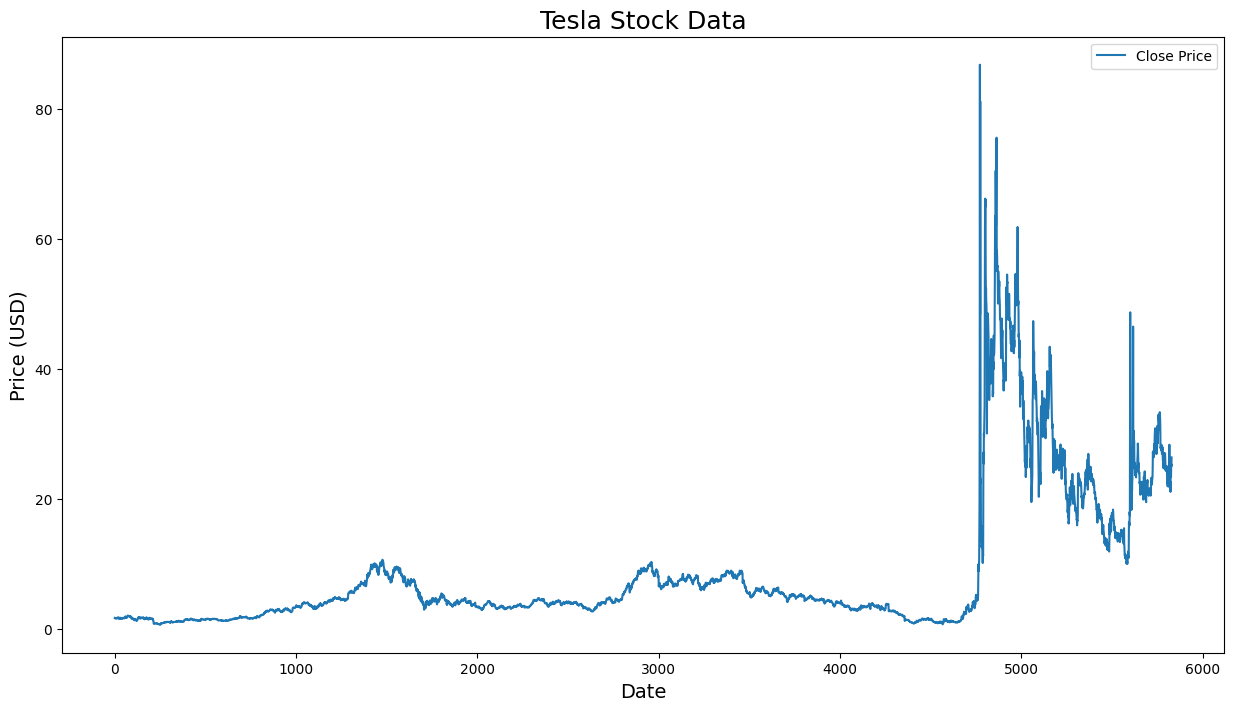

In [31]:
make_graph(gme_data, gme_revenue, 'Tesla')